## Multilayer Perceptron

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Clue 1
def plot_decision_boundary(X, target, w_input_hidden, w_hidden_output):
    h = .02  #Clue 2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    grid_input = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array(mlp_predict(grid_input, w_input_hidden, w_hidden_output))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=target, cmap=plt.cm.Spectral)
    plt.show()

Berikut adalah kode Multilayer Perceptron.  
Tugas Praktikan adalah melengkapi kode tersebut.
- Buat fungsi aktivasi step (binary) bernama percep_step().
- Buatlah fungsi aktivasi sigmoid bernama sigmoid().
- Lengkapi model Multilayer Perceptron bernama mlp_fit().
- Lengkapi prediksi bernama mlp_predict().
- Ubah format input menjadi matriks 2D menggunakan numpy.

In [3]:
import numpy as np

# Clue 1
def percep_step(input, th=0):
    return 1 if input > th else -1 if input < th else 0

# Clue 2
def sigmoid(x, derivative=False):
    if derivative:
        return (1/(1+np.exp(-x))) * (1 - 1/(1+np.exp(-x)))
    return 1/(1 + np.exp(-x))

def mlp_fit(X, target, hidden_size, learning_rate=0.1, max_epoch=-1, verbose=False):
    input_size = len(X[0])
    output_size = len(target[0])

    # Clue 3
    w_input_hidden = 2 * np.random.random((input_size, hidden_size)) - 1
    # Clue 4
    w_hidden_output = 2 * np.random.random((hidden_size, output_size)) - 1

    epoch = 0

    while max_epoch == -1 or epoch < max_epoch:
        epoch += 1

        if verbose:
            print('\nEpoch', epoch)

        for i, x in enumerate(X):
            # Clue 5
            hidden_input = np.dot(x, w_input_hidden)
            hidden_output = sigmoid(hidden_input)

            # Clue 6
            output_input = np.dot(hidden_output, w_hidden_output)
            output = percep_step(output_input)

            # Clue 7
            error = target[i] - output
            delta_output = error * sigmoid(output_input, derivative=True)
            error_hidden = delta_output.dot(w_hidden_output.T)
            delta_hidden = error_hidden * sigmoid(hidden_input, derivative=True)

            w_hidden_output += hidden_output.reshape(-1, 1) @ delta_output.reshape(1, -1) * learning_rate
            w_input_hidden += x.reshape(-1, 1) @ delta_hidden.reshape(1, -1) * learning_rate

        if verbose:
            print('Bobot Input-Hidden:', w_input_hidden)
            print('Bobot Hidden-Output:', w_hidden_output)

    return w_input_hidden, w_hidden_output, epoch

def mlp_predict(X, w_input_hidden, w_hidden_output, th=0):
    Y = []
    for x in X:
        # Clue 8
        hidden_input = np.dot(x, w_input_hidden)
        hidden_output = sigmoid(hidden_input)
        # Clue 9
        output_input = np.dot(hidden_output, w_hidden_output)
        y = percep_step(output_input, th=th)

        Y.append(y)

    return Y

def calc_accuracy(y_true, y_pred):
    s = [1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))]
    accuracy = sum(s) / len(y_true)
    return accuracy


Epoch 1
Bobot Input-Hidden: [[ 0.78858413  0.72038573 -0.80827442  0.60866147]
 [-0.36310118 -0.7717704   0.09439603  0.00889649]]
Bobot Hidden-Output: [[-0.42702956]
 [-0.76484819]
 [ 0.34122785]
 [ 0.78977742]]

Epoch 2
Bobot Input-Hidden: [[ 0.77994832  0.70541701 -0.80092799  0.62682675]
 [-0.36467208 -0.77591012  0.09457946  0.00870648]]
Bobot Hidden-Output: [[-0.40850678]
 [-0.74944698]
 [ 0.32295603]
 [ 0.80497184]]

Epoch 3
Bobot Input-Hidden: [[ 7.76276367e-01  6.99866403e-01 -7.97664854e-01  6.35816350e-01]
 [-3.61000120e-01 -7.70359512e-01  9.13163166e-02 -2.83118413e-04]]
Bobot Hidden-Output: [[-0.42035702]
 [-0.75853696]
 [ 0.28811167]
 [ 0.7877854 ]]

Epoch 4
Bobot Input-Hidden: [[ 7.67718316e-01  6.84914947e-01 -7.91388987e-01  6.53852505e-01]
 [-3.62510428e-01 -7.74347566e-01  9.14144464e-02 -4.87074390e-04]]
Bobot Hidden-Output: [[-0.40216586]
 [-0.74359802]
 [ 0.26982567]
 [ 0.80347219]]

Epoch 5
Bobot Input-Hidden: [[ 0.76405534  0.6792986  -0.78863226  0.66277743]


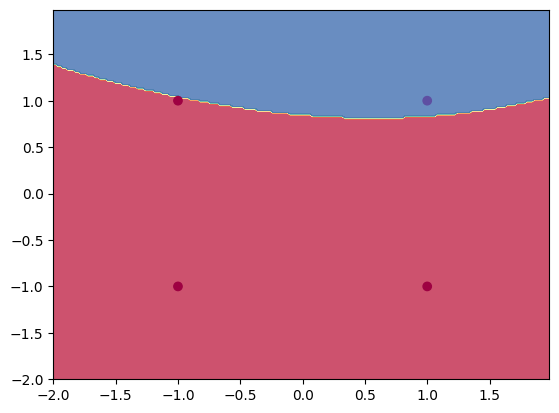

In [5]:
# Clue 1
# Clue 2
# Clue 3
train = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
target = np.array([[1, ], [-1, ], [-1, ], [-1, ]])

w_input_hidden, w_hidden_output, epoch = mlp_fit(train, target, hidden_size=4, learning_rate=0.1, max_epoch=1000, verbose=True)
output = np.array(mlp_predict(train, w_input_hidden, w_hidden_output))
accuracy = calc_accuracy(target, output)
print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

plot_decision_boundary(train, target, w_input_hidden, w_hidden_output)
